In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df = web.DataReader('NFLX',data_source='yahoo',start='2016-01-01',end='2021-04-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,110.000000,105.209999,109.000000,109.959999,20794800,109.959999
2016-01-05,110.580002,105.849998,110.449997,107.660004,17664600,107.660004
2016-01-06,117.910004,104.959999,105.290001,117.680000,33045700,117.680000
2016-01-07,122.180000,112.290001,116.360001,114.559998,33636700,114.559998
2016-01-08,117.720001,111.099998,116.330002,111.389999,18067100,111.389999
...,...,...,...,...,...,...
2021-04-19,556.440002,545.530029,546.900024,554.440002,4288700,554.440002
2021-04-20,563.559998,546.299988,554.419983,549.570007,11257600,549.570007
2021-04-21,515.460022,503.600006,508.000000,508.899994,22897400,508.899994


In [ ]:
df.shape

(1336, 6)

<function matplotlib.pyplot.show>

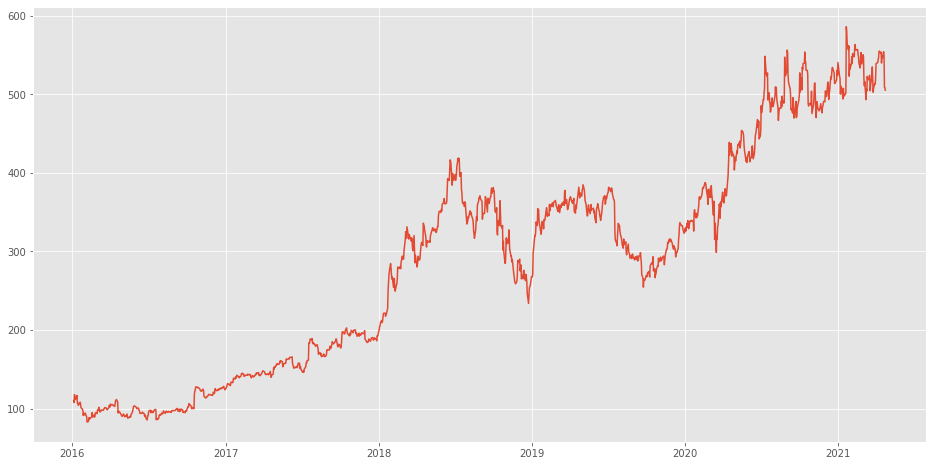

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show

In [ ]:
data=df.filter(['Close'])
print(data)


                 Close
Date                  
2016-01-04  109.959999
2016-01-05  107.660004
2016-01-06  117.680000
2016-01-07  114.559998
2016-01-08  111.389999
...                ...
2021-04-19  554.440002
2021-04-20  549.570007
2021-04-21  508.899994
2021-04-22  508.779999
2021-04-23  505.549988

[1336 rows x 1 columns]


In [ ]:
future_days = 25
df['prediction'] = df[['Close']].shift(-future_days)
df

,High,Low,Open,Close,Volume,Adj Close,prediction
Date,,,,,,,
2016-01-04,110.000000,105.209999,109.000000,109.959999,20794800,109.959999,86.129997
2016-01-05,110.580002,105.849998,110.449997,107.660004,17664600,107.660004,88.449997
2016-01-06,117.910004,104.959999,105.290001,117.680000,33045700,117.680000,86.349998
2016-01-07,122.180000,112.290001,116.360001,114.559998,33636700,114.559998,87.400002
2016-01-08,117.720001,111.099998,116.330002,111.389999,18067100,111.389999,89.050003
...,...,...,...,...,...,...,...
2021-04-19,556.440002,545.530029,546.900024,554.440002,4288700,554.440002,NaN
2021-04-20,563.559998,546.299988,554.419983,549.570007,11257600,549.570007,NaN
2021-04-21,515.460022,503.600006,508.000000,508.899994,22897400,508.899994,NaN


In [ ]:
X = np.array(df.drop(['prediction'],1))[:-future_days]
X

array([[1.10000000e+02, 1.05209999e+02, 1.09000000e+02, 1.09959999e+02,
        2.07948000e+07, 1.09959999e+02],
       [1.10580002e+02, 1.05849998e+02, 1.10449997e+02, 1.07660004e+02,
        1.76646000e+07, 1.07660004e+02],
       [1.17910004e+02, 1.04959999e+02, 1.05290001e+02, 1.17680000e+02,
        3.30457000e+07, 1.17680000e+02],
       ...,
       [5.33419983e+02, 5.23210022e+02, 5.24469971e+02, 5.24030029e+02,
        3.21680000e+06, 5.24030029e+02],
       [5.28369995e+02, 5.14299988e+02, 5.22000000e+02, 5.24440002e+02,
        2.79280000e+06, 5.24440002e+02],
       [5.17900024e+02, 5.03850006e+02, 5.16400024e+02, 5.04790009e+02,
        4.09450000e+06, 5.04790009e+02]])

In [ ]:
y=np.array(df['prediction'])[:-future_days]
y

array([ 86.12999725,  88.44999695,  86.34999847, ..., 508.8999939 ,
       508.77999878, 505.54998779])

In [ ]:
x_train, x_test , y_train , y_test = train_test_split(X,y,test_size = 0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)

lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df.drop(['prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[5.65929993e+02, 5.54219971e+02, 5.64440002e+02, 5.57590027e+02,
        2.72670000e+06, 5.57590027e+02],
       [5.61250000e+02, 5.50849976e+02, 5.56940002e+02, 5.56520020e+02,
        2.19590000e+06, 5.56520020e+02],
       [5.63630005e+02, 5.52729980e+02, 5.57289978e+02, 5.57280029e+02,
        2.62410000e+06, 5.57280029e+02],
       [5.55250000e+02, 5.43030029e+02, 5.50989990e+02, 5.51340027e+02,
        2.06960000e+06, 5.51340027e+02],
       [5.50000000e+02, 5.38229980e+02, 5.49000000e+02, 5.48219971e+02,
        2.45620000e+06, 5.48219971e+02],
       [5.48989990e+02, 5.38809998e+02, 5.48000000e+02, 5.40219971e+02,
        2.84150000e+06, 5.40219971e+02],
       [5.41789978e+02, 5.30789978e+02, 5.34989990e+02, 5.33780029e+02,
        3.07860000e+06, 5.33780029e+02],
       [5.48539978e+02, 5.18280029e+02, 5.25000000e+02, 5.46150024e+02,
        4.13650000e+06, 5.46150024e+02],
       [5.56849976e+02, 5.39070007e+02, 5.39799988e+02, 5.53409973e+02,
        3.24500000e+06, 

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[512.17999268 523.10998535 535.09002686 520.80999756 502.85998535
 523.05999756 540.66998291 513.39001465 521.65997314 539.41998291
 540.66998291 520.25       546.98999023 513.39001465 555.30999756
 552.7800293  553.72998047 540.02001953 549.2199707  500.85998535
 549.57000732 549.57000732 508.8999939  508.77999878 503.22000122]


In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[554.78846579 553.8549023  557.31072992 549.18058553 541.0392233
 537.83531705 536.6428778  564.89387735 563.09080604 551.46154134
 546.47647886 546.92091847 547.68900298 538.74515361 530.08951392
 514.95470572 514.26959595 508.24333991 513.58155983 537.47270418
 531.091113   516.30564982 530.16189945 525.93541425 508.52204405]


503.2200012207031


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


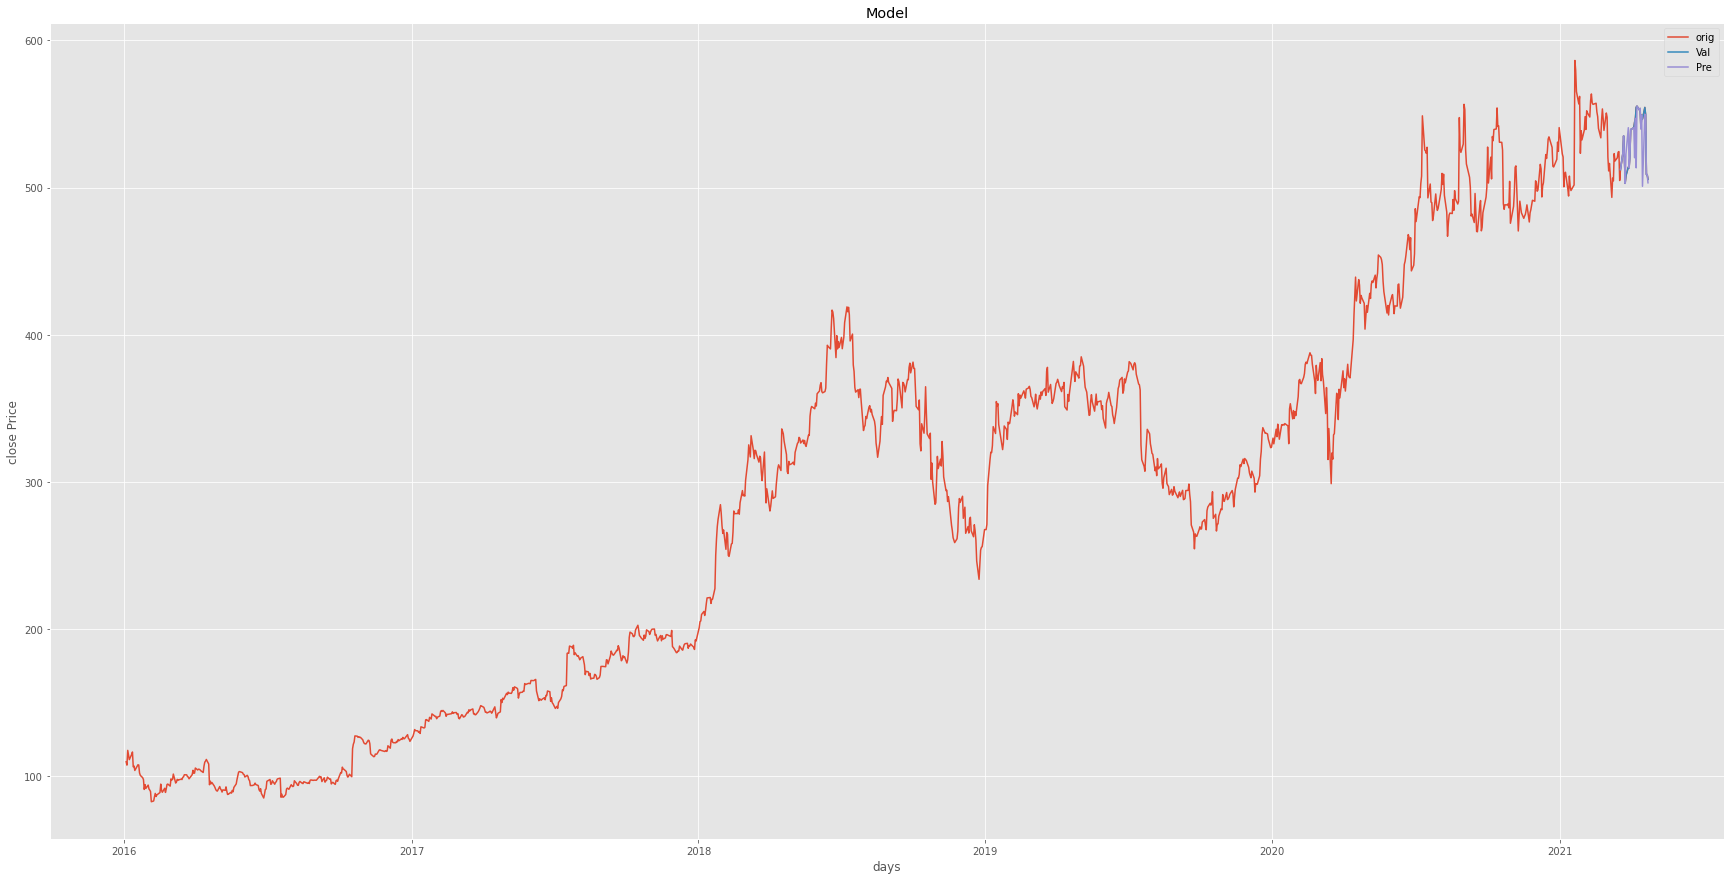

In [ ]:
predictions = tree_prediction

valid =df[X.shape[0]:]
valid['Predictions'] = predictions
#Prediction value for 23 April 2021
print(valid['Predictions']['2021-04-23'])
plt.figure(figsize=(30,15))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['orig','Val','Pre'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


508.52204404755594


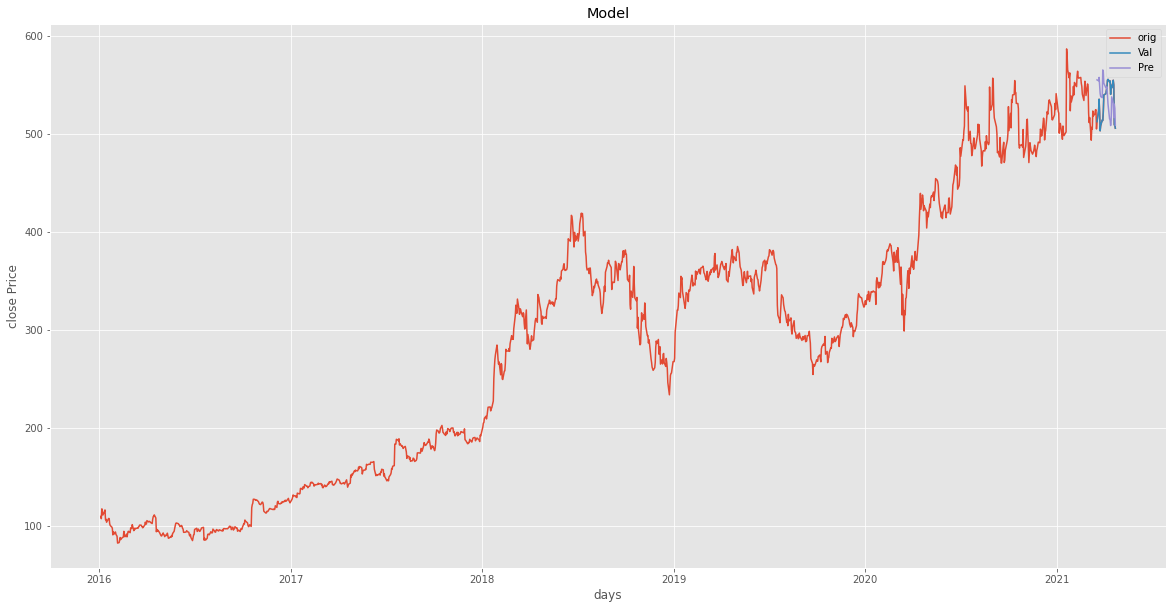

In [ ]:
predictions = lr_prediction

valid =df[X.shape[0]:]
valid['Predictions'] = predictions
#Prediction value for 23 April 2021
print(valid['Predictions']['2021-04-23'])
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['orig','Val','Pre'])
plt.show()